In [1]:
# import dependencies
# data cleaning and manipulation 
import pandas as pd
import numpy as np
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# machine learning
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split


In [30]:
#4 Load the data 
Incomedata = pd.read_csv(r"C:\Users\fahad\OneDrive\Desktop\Assignment2Data.csv", delimiter=",", encoding='utf-8')
Incomedata

,Age,Work_class,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [33]:
Incomedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Work_class      32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
Incomedata.head()

,Age,Work_class,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


C:\Users\fahad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

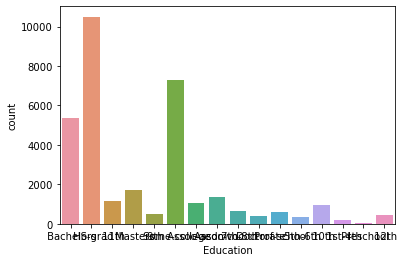

In [35]:
#5.1.	Plot a historgram of the number of individuals who have an Masters degree
sns.countplot(Incomedata['Education'])

AttributeError: 'Line2D' object has no property 'width'

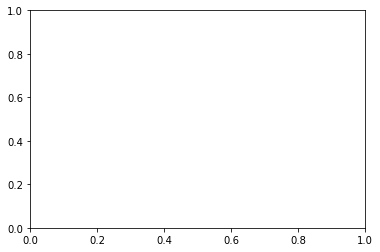

In [59]:
#5.2.	Plot the average Capital-gain recorded by Age. Explain if you see if a trend and what it might represent.   
#plt.scatter(Incomedata['Capital-gain'],Incomedata['Age'])
#plt.plot(Incomedata['Capital-gain'],Incomedata['Age'])
plt.plot(Incomedata['Capital-gain'],Incomedata['Age'], width =0.5, label = 'income')

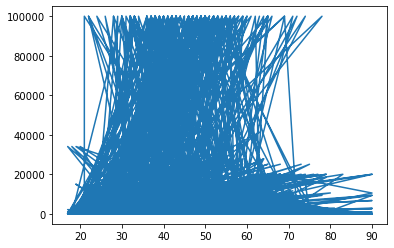

In [54]:
plt.plot(Incomedata['Age'], Incomedata['Capital-gain'], linestyle='solid')

In [86]:
#5.2.	Plot the average Capital-gain recorded by Age. Explain if you see if a trend and what it might represent.   
#plt.scatter(Incomedata['Capital-gain'],Incomedata['Age'])
#plt.plot(Incomedata['Capital-gain'],Incomedata['Age'])


<AxesSubplot:xlabel='Capital-gain', ylabel='Age'>

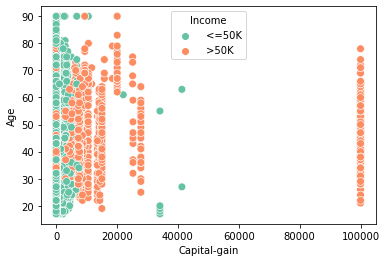

In [55]:
sns.scatterplot(data=Incomedata, x='Capital-gain', y='Age', hue='Income', palette='Set2', s=60)

<AxesSubplot:xlabel='Race'>

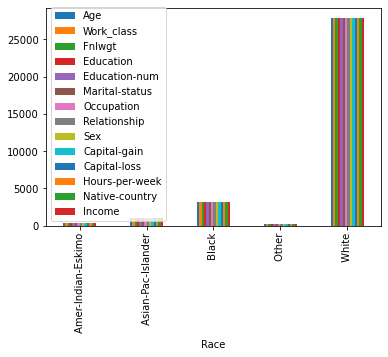

In [60]:
#5.3.	Explain with graphs, whether the data is diverse, in terms of Race and Sex.    
Incomedata.groupby('Race').count().plot(kind='bar')

<Figure size 14400x14400 with 0 Axes>

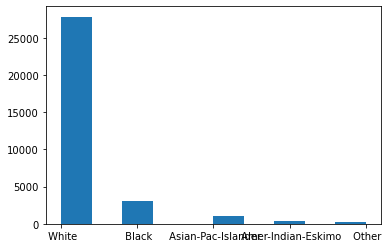

<Figure size 14400x14400 with 0 Axes>

In [85]:
plt.hist(Incomedata['Race'])
plt.figure(figsize=(200, 200))

<AxesSubplot:xlabel='Race', ylabel='Count'>

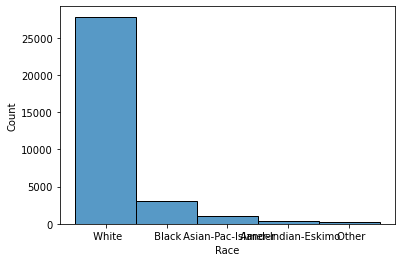

In [70]:
sns.histplot(data=Incomedata, x='Race')

Text(0, 0.5, 'Income')

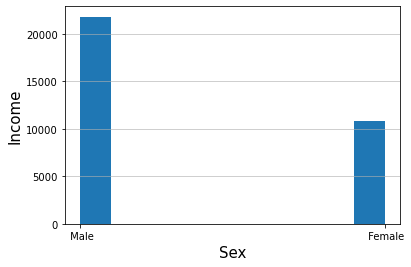

In [78]:
plt.hist(Incomedata['Sex'])
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Income',fontsize=15)

<AxesSubplot:xlabel='Sex'>

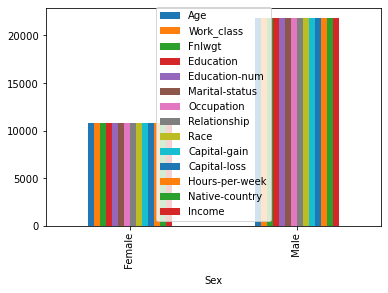

In [61]:
Incomedata.groupby('Sex').count().plot(kind='bar')

<AxesSubplot:xlabel='Hours-per-week', ylabel='Native-country'>

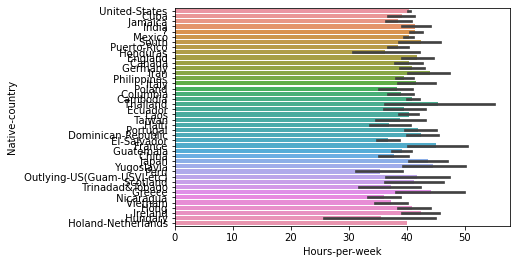

In [63]:
#5.4.	Plot Hours-per-week vs Native-country. Explain trends that you saw with this plot.  palette='pastel', ci=None
sns.barplot(data=Incomedata, x='Hours-per-week', y='Native-country')

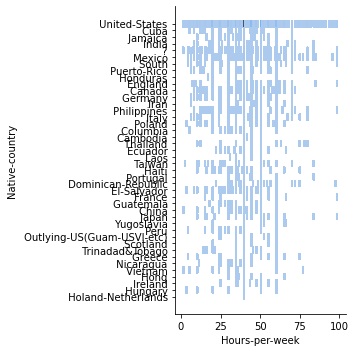

In [65]:
sns.displot(data=Incomedata, x='Hours-per-week', y='Native-country', bins=100)